In [319]:
# Importing libraries needed

import os
import json
import numpy as np
import pandas as pd
import seaborn as sns

In [320]:
# Making sure I am in the correct directory to import files

os.getcwd()

'C:\\Users\\Danie'

In [321]:
# Changing to directory where files are stored

os.chdir("C:\\Users\\Danie")

# Initial data exploration and cleaning

I started by loading the csv and json files into panda data frames to begin understanding the datasets.

From these initial observations, I began cleaning the data.

## Products.csv initial exploration

In [323]:
products_csv = pd.read_csv("products.csv") # Importing data
#display(products_csv.head()) 
#display commented out for readability
print(products_csv.shape) # Checking size of data set
print(products_csv.count()) # Using the count function has showed that the SKU, Description, and Price columns are missing some data
print(products_csv.isnull().sum()) # Further to the .count() funtion, I am finding out how many values are missing from each column
print(products_csv.dtypes) # Checking data types


(7982, 6)
Uniq_id        7982
SKU            7915
Name           7982
Description    7439
Price          5816
Av_Score       7982
dtype: int64
Uniq_id           0
SKU              67
Name              0
Description     543
Price          2166
Av_Score          0
dtype: int64
Uniq_id         object
SKU             object
Name            object
Description     object
Price          float64
Av_Score       float64
dtype: object


## Users.csv initial exploration

In [182]:
users = pd.read_csv("users.csv")
#display(users.head())
print(users.shape)
print(users.isnull().sum()) #Checking for missing values
print(users.dtypes)

(5000, 3)
Username    0
DOB         0
State       0
dtype: int64
Username    object
DOB         object
State       object
dtype: object


## Reviews.csv initial exploration

In [324]:
# Same process as above, importing data set, looking at size of dataframe, checking for missing values

reviews_csv = pd.read_csv("reviews.csv")
#display(reviews_csv.head())
print(reviews_csv.shape)
print(reviews_csv.isnull().sum())
print(reviews_csv.dtypes)

(39063, 4)
Uniq_id     0
Username    0
Score       0
Review      0
dtype: int64
Uniq_id     object
Username    object
Score        int64
Review      object
dtype: object


## jcpenney_products.json initial exploration

I decided to use this dataframe to calculate average product ratings because there are differences in the review values between this set and the CSV file.

In [ ]:
products_json = pd.read_json("jcpenney_products.json", lines = True)
#display(products_json.head())
print(products_json.shape)
print(products_json.count())
print(products_json.isnull().sum())
print(products_json.dtypes)


In [330]:
products_json.replace("", np.nan, inplace=True)
print(products_json.isnull().sum()) #Finding out where missing values are
print(products_json.info())

uniq_id                      0
sku                         67
name_title                   0
description                543
list_price                2166
sale_price                  18
category                   636
category_tree              636
average_product_rating       0
product_url                  0
product_image_urls         157
brand                        0
total_number_reviews         0
Reviews                      0
Bought With                  0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7982 entries, 0 to 7981
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   uniq_id                 7982 non-null   object 
 1   sku                     7915 non-null   object 
 2   name_title              7982 non-null   object 
 3   description             7439 non-null   object 
 4   list_price              5816 non-null   object 
 5   sale_price              7964 non-null  

## jcpenney_reviewers.json initial exploration

In [331]:
#As above, loading datafreame, looking at size and for missing values

reviews_json = pd.read_json("jcpenney_reviewers.json", lines=True)
#display(reviews_json.head())
print(reviews_json.shape)
print(reviews_json.count())
print(reviews_json.isnull().sum())


(5000, 4)
Username    5000
DOB         5000
State       5000
Reviewed    5000
dtype: int64
Username    0
DOB         0
State       0
Reviewed    0
dtype: int64


In [326]:
reviews_json.replace("", np.nan, inplace=True) #replacing empty strings with Nan
print(reviews_json.isnull().sum()) #Finding out where missing values are

Username    0
DOB         0
State       0
Reviewed    0
dtype: int64


## Cleaning data set and creating a subset to visualise top reviewed products

Cleaning products JSON file

In [332]:
products_json.replace("", np.nan, inplace=True) #replacing empty strings with Nan
print(products_json.isnull().sum()) #Looking for missing values

print(products_json.dtypes)

uniq_id                      0
sku                         67
name_title                   0
description                543
list_price                2166
sale_price                  18
category                   636
category_tree              636
average_product_rating       0
product_url                  0
product_image_urls         157
brand                        0
total_number_reviews         0
Reviews                      0
Bought With                  0
dtype: int64
uniq_id                    object
sku                        object
name_title                 object
description                object
list_price                 object
sale_price                 object
category                   object
category_tree              object
average_product_rating    float64
product_url                object
product_image_urls         object
brand                      object
total_number_reviews        int64
Reviews                    object
Bought With                object
dtype: objec

In [129]:
#Changing datatype to float

products_json["list_price"] = products_json["list_price"].astype(float)

In [333]:
#When I initially ran the function to convert object to float, there was an error because some prices were in ranges.
#Changing values to numeric data and ranges to Nan values

products_json["sale_price"] = pd.to_numeric(products_json["sale_price"], errors = "coerce") 

In [131]:
#Changing datatype to float

products_json["sale_price"] = products_json["sale_price"].astype(float)

## Creating subset of Products JSON to show true average value by SKU

In [85]:
products_json["sku"] = products_json["sku"].astype(str) 
#I was getting an error when running the code in cell 81, converting to a str fixed this

In [340]:
#products_json.head()

In [345]:
#Creating a more manageable subset to group the SKU's and get an overall mean for each

subset = products_json[["name_title","sku","average_product_rating","total_number_reviews"]]

#Removing empty values in sku column

subset = subset[subset["sku"] != "nan"]

In [342]:
#display(subset.head())
print(subset.dtypes)

name_title                 object
sku                        object
average_product_rating    float64
total_number_reviews        int64
dtype: object


In [347]:
# There are muptiple rows for each sku so I am grouping them together and caluclating the average of the \n
#"average_product_ rating" to get an average rating for each product

subset = subset.groupby(["name_title","sku"]).agg(
    total_av = ("average_product_rating","mean"), 
    total_reviews = ("total_number_reviews","sum"))

In [348]:
#Sorting to see which products have the most/least reviews

subset_sorted = subset.sort_values(by = "total_reviews", ascending = False)
display(subset_sorted)

,,total_av,total_reviews
name_title,sku,,
Stafford® Gunner Mens Cap Toe Leather Boots,pp5004560042,2.777778,144
Clarks® Leisa Grove Leather Sandals,pp5006210554,3.125000,144
Xersion™ Quick-Dri Performance Bootcut Pant,pp5005870510,3.057692,104
Clarks® Leisa Grove Leather Sandals - Wide Width,pp5006210555,3.050595,81
St. John's Bay® Secretly Slender Straight-Leg Jeans,pp5005840398,3.075000,80
...,...,...,...
nicole by Nicole Miller® Tess Shoulder Bag,pp5006750733,4.000000,1
philosophy Purity Made Simple,pp5005650382,2.000000,1
softspots® Caren Leather Loafers - Wide Width,pp5005790633,1.000000,1


In [352]:
print(sum(subset_sorted["total_reviews"] > 10))
# I recognised above that if I were to plot the subset that the data would be skewed by the products which only have 1 review.
# Therefore, I decided to only plot products which have more than 10 reviews = 763 products

763


In [354]:
# Creating a new sub set with products which have more than 10 reviews

x = subset_sorted["total_reviews"] > 10

top_reviewed = subset_sorted[x].reset_index()

# Sorting by highest average review

top_reviewed_ordered = top_reviewed.sort_values(by = "total_av", ascending = False)

# Creating smaller subsets of the top and bottom 10 products by average review so that they fit on a bar chart

top_10 = top_reviewed_ordered.head(10)

bottom_10 = top_reviewed_ordered.tail(10)


In [355]:
display(top_reviewed_ordered)

,name_title,sku,total_av,total_reviews
241,Michael Antonio Tipton T-Strap Pumps,pp5005130029,3.950000,20
732,Xersion™ Digital Print Basketball Shorts,pp5006440008,3.895833,11
332,Stylus ™ Ribbed Tank Top,pp5006462155,3.875000,16
459,Xersion™ Performance Warm-X Leggings - Tall,pp5006153362,3.875000,16
606,Murad Aha/Bha Exfoliating Cleanser,pp5005640818,3.857143,14
...,...,...,...,...
534,Zeroxposur® Static Wide-Strap Tankini Swim Top...,pp5006640562,2.125000,16
244,Wicker Chair Cushion,pp5005430549,2.125000,19
718,Marc Jacobs Beauty Enamored Hi-Shine Nail Polish,pp5006620365,2.090909,11
451,St. John's Bay® Short-Sleeve V-Neck T-Shirt,pp5006310918,2.062500,16


In [145]:
import matplotlib.pyplot as plt
%matplotlib inline

## Creating a visualisation to look at the top and bottom 25 products by average user rating

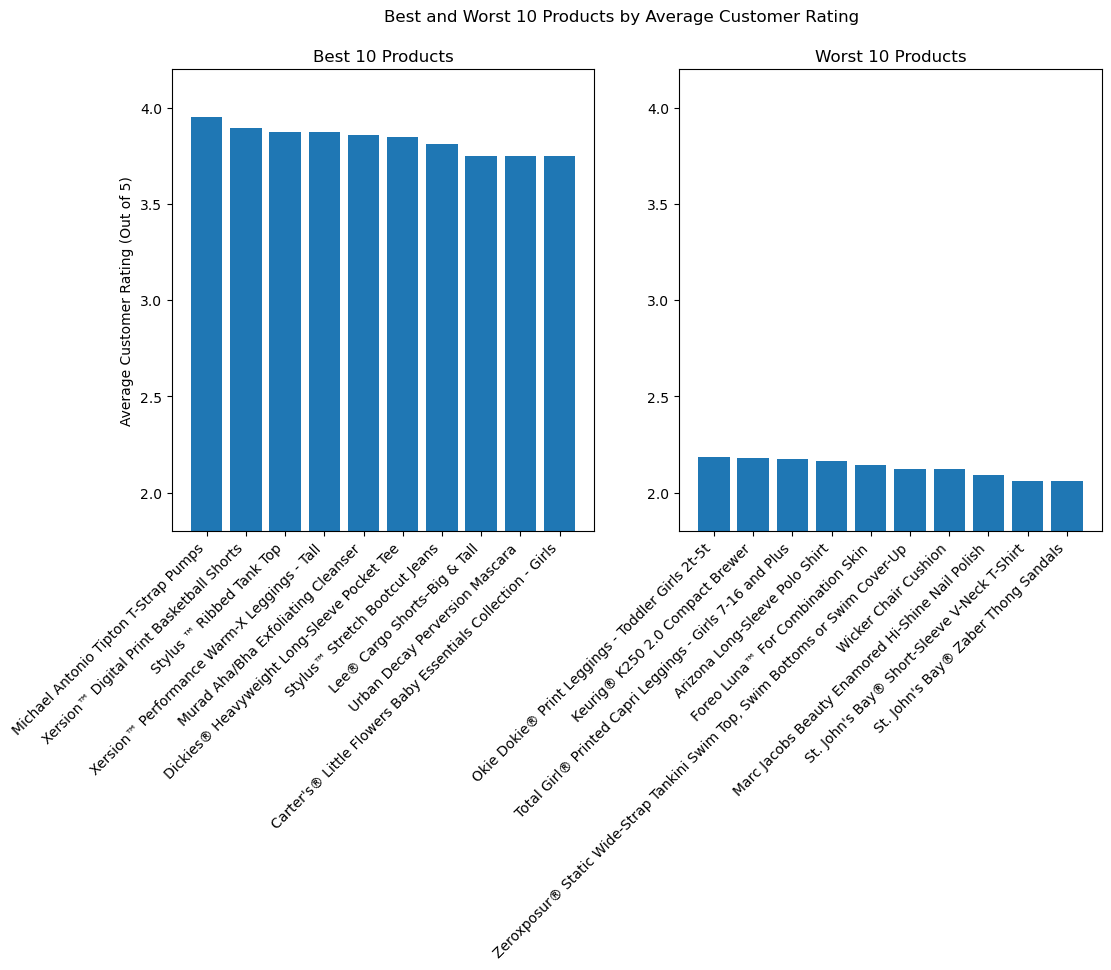

In [392]:
plt.figure(figsize=(12,6))

plt.subplot(121)
plt.title("Best 10 Products")
plt.ylabel("Average Customer Rating (Out of 5)")
plt.bar(top_10["name_title"],top_10["total_av"])
plt.xticks(ticks=range(len(top_10)),
           labels=top_10["name_title"],
           rotation=45,
          ha="right")
plt.ylim(1.8,4.2)

plt.subplot(122)
plt.title("Worst 10 Products")
plt.bar(bottom_10["name_title"],bottom_10["total_av"])
plt.xticks(ticks=range(len(top_10)),
           labels=bottom_10["name_title"],
           rotation=45,
          ha="right")
plt.ylim(1.8,4.2)

plt.suptitle("Best and Worst 10 Products by Average Customer Rating")

plt.show()

## Creating a visualisation to look at the overall average product score (for products with more than 10 reviews)

In [171]:
print(top_reviewed.shape)

(798, 3)


In [177]:
product_average = top_reviewed["total_av"].mean()

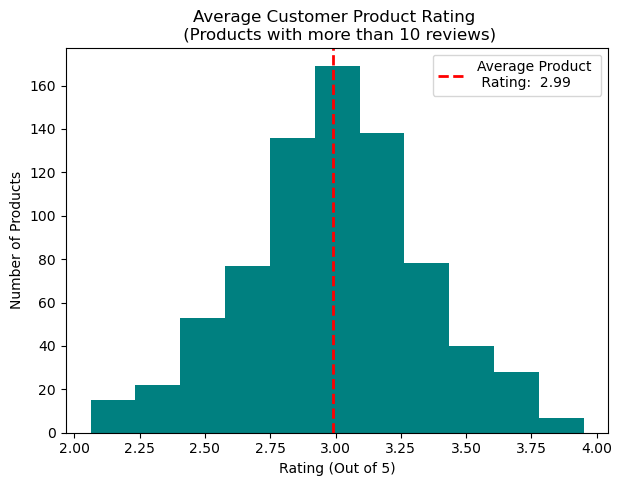

In [394]:
plt.figure(figsize=(7,5))

plt.hist(top_reviewed["total_av"], bins=11,
        color="teal")

plt.axvline(x=product_average,
            color="red",
            linestyle="--",
            linewidth=2,
            label=f"Average Product \n Rating: {product_average: .2f}")

plt.title("Average Customer Product Rating \n (Products with more than 10 reviews)")
plt.legend()
plt.xlabel("Rating (Out of 5)")
plt.ylabel("Number of Products")
plt.show()

## Exploring which brands are best and worst reviewed

In [190]:
df = pd.read_json("jcpenney_products.json", lines=True)
display(df.head())

,uniq_id,sku,name_title,description,list_price,sale_price,category,category_tree,average_product_rating,product_url,product_image_urls,brand,total_number_reviews,Reviews,Bought With
0,b6c0b6bea69c722939585baeac73c13d,pp5006380337,Alfred Dunner® Essential Pull On Capri Pant,You'll return to our Alfred Dunner pull-on cap...,41.09,24.16,alfred dunner,jcpenney|women|alfred dunner,2.625,http://www.jcpenney.com/alfred-dunner-essentia...,http://s7d9.scene7.com/is/image/JCPenney/DP122...,Alfred Dunner,8,"[{'User': 'fsdv4141', 'Review': 'You never hav...","[898e42fe937a33e8ce5e900ca7a4d924, 8c02c262567..."
1,93e5272c51d8cce02597e3ce67b7ad0a,pp5006380337,Alfred Dunner® Essential Pull On Capri Pant,You'll return to our Alfred Dunner pull-on cap...,41.09,24.16,alfred dunner,jcpenney|women|alfred dunner,3.000,http://www.jcpenney.com/alfred-dunner-essentia...,http://s7d9.scene7.com/is/image/JCPenney/DP122...,Alfred Dunner,8,"[{'User': 'tpcu2211', 'Review': 'You never hav...","[bc9ab3406dcaa84a123b9da862e6367d, 18eb69e8fc2..."
2,013e320f2f2ec0cf5b3ff5418d688528,pp5006380337,Alfred Dunner® Essential Pull On Capri Pant,You'll return to our Alfred Dunner pull-on cap...,41.09,24.16,view all,jcpenney|women|view all,2.625,http://www.jcpenney.com/alfred-dunner-essentia...,http://s7d9.scene7.com/is/image/JCPenney/DP122...,Alfred Dunner,8,"[{'User': 'pcfg3234', 'Review': 'You never hav...","[3ce70f519a9cfdd85cdbdecd358e5347, b0295c96d2b..."
3,505e6633d81f2cb7400c0cfa0394c427,pp5006380337,Alfred Dunner® Essential Pull On Capri Pant,You'll return to our Alfred Dunner pull-on cap...,41.09,24.16,view all,jcpenney|women|view all,3.500,http://www.jcpenney.com/alfred-dunner-essentia...,http://s7d9.scene7.com/is/image/JCPenney/DP122...,Alfred Dunner,8,"[{'User': 'ngrq4411', 'Review': 'You never hav...","[efcd811edccbeb5e67eaa8ef0d991f7c, 7b2cc00171e..."
4,d969a8542122e1331e304b09f81a83f6,pp5006380337,Alfred Dunner® Essential Pull On Capri Pant,You'll return to our Alfred Dunner pull-on cap...,41.09,24.16,view all,jcpenney|women|view all,3.125,http://www.jcpenney.com/alfred-dunner-essentia...,http://s7d9.scene7.com/is/image/JCPenney/DP122...,Alfred Dunner,8,"[{'User': 'nbmi2334', 'Review': 'You never hav...","[0ca5ad2a218f59eb83eec1e248a0782d, 9869fc8da14..."


In [191]:
df.drop(columns = ["product_image_urls", "product_url","Reviews","Bought With","category_tree","category","description"], inplace=True)
display(df.head())

# Making number of columns more manageable

,uniq_id,sku,name_title,list_price,sale_price,average_product_rating,brand,total_number_reviews
0,b6c0b6bea69c722939585baeac73c13d,pp5006380337,Alfred Dunner® Essential Pull On Capri Pant,41.09,24.16,2.625,Alfred Dunner,8
1,93e5272c51d8cce02597e3ce67b7ad0a,pp5006380337,Alfred Dunner® Essential Pull On Capri Pant,41.09,24.16,3.000,Alfred Dunner,8
2,013e320f2f2ec0cf5b3ff5418d688528,pp5006380337,Alfred Dunner® Essential Pull On Capri Pant,41.09,24.16,2.625,Alfred Dunner,8
3,505e6633d81f2cb7400c0cfa0394c427,pp5006380337,Alfred Dunner® Essential Pull On Capri Pant,41.09,24.16,3.500,Alfred Dunner,8
4,d969a8542122e1331e304b09f81a83f6,pp5006380337,Alfred Dunner® Essential Pull On Capri Pant,41.09,24.16,3.125,Alfred Dunner,8


In [208]:
# Reducing size further to make a subset for the brand exploration

brands = df[["brand","average_product_rating","total_number_reviews"]]
display(brands.head())

,brand,average_product_rating,total_number_reviews
0,Alfred Dunner,2.625,8
1,Alfred Dunner,3.000,8
2,Alfred Dunner,2.625,8
3,Alfred Dunner,3.500,8
4,Alfred Dunner,3.125,8


In [210]:
unique = brands["brand"].unique()
#display(brands)
print(len(unique))

721


In [379]:
# I want to find out what brands have the lowest ratings to see if there are trends but as above, I want to filter out\n
# brands which have less than 10 reviews so we have a reasonable sample size
import pandas as pd

brands_sub = brands.groupby("brand").agg(
    average_rating = ("average_product_rating","mean"), 
    total_reviews = ("total_number_reviews","sum"))

display(brands_sub.head())
print(len(brands_sub))

,average_rating,total_reviews
brand,,
1928 Jewelry,4.750000,3
A.N.A,3.032509,1106
A2 BY AEROSOLES,3.288046,118
ACE BAYOU,2.500000,11
ADIDAS,3.075809,351


721


In [385]:
brands_sorted = brands_sub.sort_values(by = "average_rating", ascending = False).round(2)
display(brands_sorted.head())

,average_rating,total_reviews
brand,,
BIALETTI,5.0,1
SKYWAY,5.0,2
Q-T INTIMATES,5.0,1
Bee Darlin Bee Smart,5.0,1
FIFTH AND PARK,5.0,1


In [386]:
x = brands_sorted["total_reviews"] > 10

In [387]:
brands_sorted = brands_sorted[x]

display(brands_sorted.head())

,average_rating,total_reviews
brand,,
CREATIVE BATH,4.20,12
Nicole By Nicole Miller,4.18,21
SKYLINE FURNITURE,4.12,14
UMBRA,3.98,12
Nordicware,3.92,20


In [388]:
best_brands = brands_sorted.head(10).reset_index()
worst_brands = brands_sorted.tail(10).reset_index()

In [389]:
display(worst_brands)
display(best_brands)

,brand,average_rating,total_reviews
0,FOREO,2.38,22
1,John Deere,2.38,14
2,Certified International,2.33,22
3,FROZEN,2.29,11
4,PHILIPS,2.22,11
5,Ariya,2.19,11
6,MARC JACOBS BEAUTY,2.09,11
7,Seventeen,2.07,50
8,SLEEP PHILOSOPHY,2.06,11
9,Warner's,2.05,33


,brand,average_rating,total_reviews
0,CREATIVE BATH,4.20,12
1,Nicole By Nicole Miller,4.18,21
2,SKYLINE FURNITURE,4.12,14
3,UMBRA,3.98,12
4,Nordicware,3.92,20
5,MURAD,3.86,14
6,LILIANA,3.73,11
7,Buxton,3.70,14
8,National Presto,3.69,11
9,EVA LONGORIA HOME,3.68,16


## Plotting the 25 worst reviewed brands - decided not to use this visualisation as I think diplaying as a list is clearer

In [239]:
plt.figure(figsize=(8,6))

plt.barh(y=worst_brands["brand"],width=worst_brands["average_rating"],
        color="firebrick")
#plt.show()

<BarContainer object of 20 artists>

## Exploring customer data

In [241]:
users_csv = pd.read_csv("users.csv")
display(users_csv.head())
print(len(users_csv))

,Username,DOB,State
0,bkpn1412,31.07.1983,Oregon
1,gqjs4414,27.07.1998,Massachusetts
2,eehe1434,08.08.1950,Idaho
3,hkxj1334,03.08.1969,Florida
4,jjbd1412,26.07.2001,Georgia


5000


In [242]:
users_json = pd.read_json("jcpenney_reviewers.json", lines=True)
display(users_json)
print(len(users_json))

,Username,DOB,State,Reviewed
0,bkpn1412,31.07.1983,Oregon,[cea76118f6a9110a893de2b7654319c0]
1,gqjs4414,27.07.1998,Massachusetts,[fa04fe6c0dd5189f54fe600838da43d3]
2,eehe1434,08.08.1950,Idaho,[]
3,hkxj1334,03.08.1969,Florida,"[f129b1803f447c2b1ce43508fb822810, 3b0c9bc0be6..."
4,jjbd1412,26.07.2001,Georgia,[]
...,...,...,...,...
4995,mfnn1212,27.07.1997,Delaware,[d6cd506246bd17afa611b6a06236713c]
4996,ejnb3414,01.08.1976,Minnesota,[97de1506cd0bcbe50f2797cd0588eb81]
4997,pdzw1433,28.07.1994,Ohio,"[799d62906019d910fa744987da184ae7, b8f5deb7b02..."
4998,npha1342,07.08.1953,Montana,[6250b1d691cd3842f05b87736f2fadbf]


5000


In [246]:
#Finding out how many states are represented in the data

states = users_csv["State"].unique()
display(states)

array(['Oregon', 'Massachusetts', 'Idaho', 'Florida', 'Georgia',
       'Montana', 'Pennsylvania', 'Connecticut', 'Arkansas', 'Nebraska',
       'California', 'New Hampshire', 'District of Columbia',
       'Washington', 'Minnesota', 'New Mexico', 'Virginia', 'Kansas',
       'Illinois', 'North Dakota', 'Colorado', 'New York',
       'Minor Outlying Islands', 'Northern Mariana Islands',
       'West Virginia', 'Texas', 'South Dakota', 'Maryland', 'Maine',
       'Ohio', 'Rhode Island', 'Michigan', 'Alaska', 'Iowa', 'Oklahoma',
       'Mississippi', 'South Carolina', 'Missouri', 'New Jersey',
       'Tennessee', 'North Carolina', 'Guam', 'Wyoming', 'Delaware',
       'Vermont', 'Indiana', 'Louisiana', 'Wisconsin', 'Hawaii',
       'Puerto Rico', 'Alabama', 'Kentucky', 'Arizona', 'Nevada', 'Utah',
       'American Samoa', 'U.S. Virgin Islands'], dtype=object)

In [269]:
#Finding out how many users there are per state

state_count = users_csv["State"].value_counts()

In [271]:
#print(state_count)

## Plotting data to show states which have highest and lowest number of users/customers

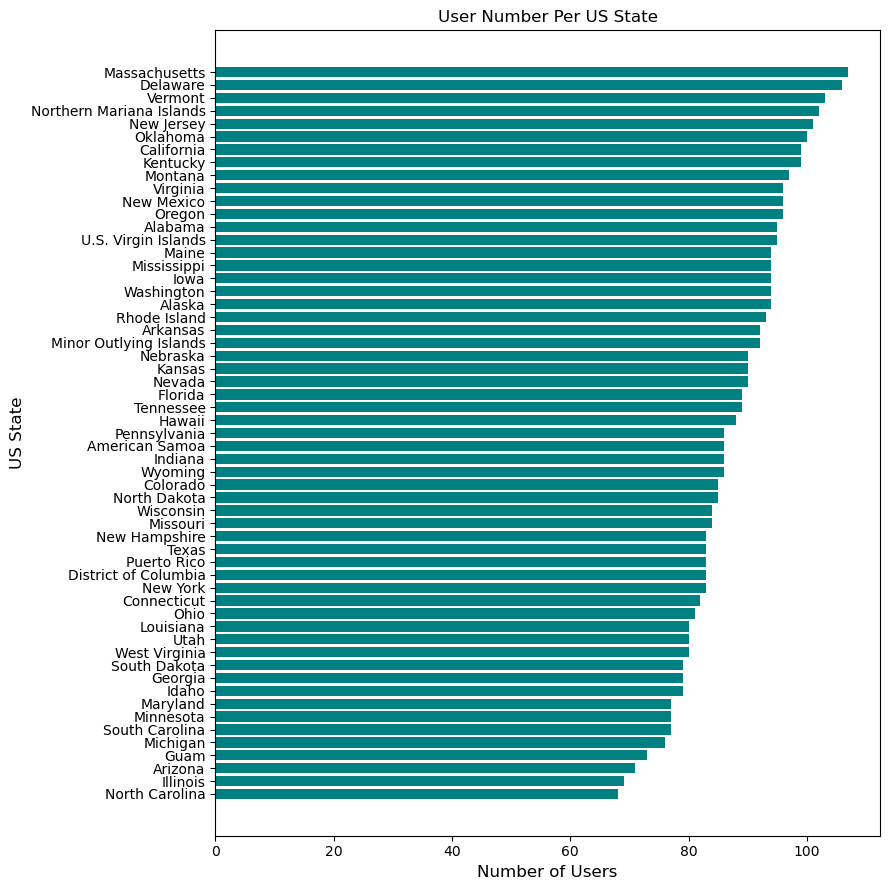

In [279]:
plt.figure(figsize=(9,9))

plt.barh(y=state_count.index,
         width=state_count.values,
         color="teal")

plt.title("User Number Per US State")
plt.xlabel("Number of Users", fontsize=12)
plt.ylabel("US State", fontsize=12)

plt.tight_layout()

plt.gca().invert_yaxis()
plt.show()


## Plotting users per state on US map with Plotly

In [280]:
import plotly.graph_objects as go

In [281]:
users = pd.read_csv("users.csv")

In [283]:
# Creating a subset which shows users per state

state_counts = users["State"].value_counts().reset_index()
state_counts.columns = ["State", "user_count"]

In [284]:

display(state_counts.head())

,State,user_count
0,Massachusetts,107
1,Delaware,106
2,Vermont,103
3,Northern Mariana Islands,102
4,New Jersey,101


In [285]:
states = users_csv["State"].unique()
display(states)

array(['Oregon', 'Massachusetts', 'Idaho', 'Florida', 'Georgia',
       'Montana', 'Pennsylvania', 'Connecticut', 'Arkansas', 'Nebraska',
       'California', 'New Hampshire', 'District of Columbia',
       'Washington', 'Minnesota', 'New Mexico', 'Virginia', 'Kansas',
       'Illinois', 'North Dakota', 'Colorado', 'New York',
       'Minor Outlying Islands', 'Northern Mariana Islands',
       'West Virginia', 'Texas', 'South Dakota', 'Maryland', 'Maine',
       'Ohio', 'Rhode Island', 'Michigan', 'Alaska', 'Iowa', 'Oklahoma',
       'Mississippi', 'South Carolina', 'Missouri', 'New Jersey',
       'Tennessee', 'North Carolina', 'Guam', 'Wyoming', 'Delaware',
       'Vermont', 'Indiana', 'Louisiana', 'Wisconsin', 'Hawaii',
       'Puerto Rico', 'Alabama', 'Kentucky', 'Arizona', 'Nevada', 'Utah',
       'American Samoa', 'U.S. Virgin Islands'], dtype=object)

In [286]:
# Removing US territories so that the remaining states align with the US map graph

remove = ["Minor Outlying Islands", "Northern Mariana Islands", 
          "Guam", "Puerto Rico", "American Samoa", "U.S. Virgin Islands",
          "District of Columbia"]

In [291]:
to_drop = state_counts["State"].isin(remove)

In [295]:
# Creating a subset of the filtered states

states_filtered = state_counts[~to_drop]
states_filtered = states_filtered.reset_index(drop=True)

In [297]:
#display(states_filtered)
print(len(states_filtered))

50


In [300]:
# Converting state names to state codes - required for mapping onto go.Choropleth

state_codes = {'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 
    'California': 'CA', 'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 
    'Florida': 'FL', 'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID', 
    'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS', 
    'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD', 
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 
    'Mississippi': 'MS', 'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 
    'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM', 
    'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 
    'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 
    'South Carolina': 'SC', 'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 
    'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA', 
    'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY', 
    'District of Columbia': 'DC'}

In [304]:
# Adding state codes to data frame

states_filtered["state_codes"] = states_filtered["State"].map(state_codes)
#display(states_filtered)

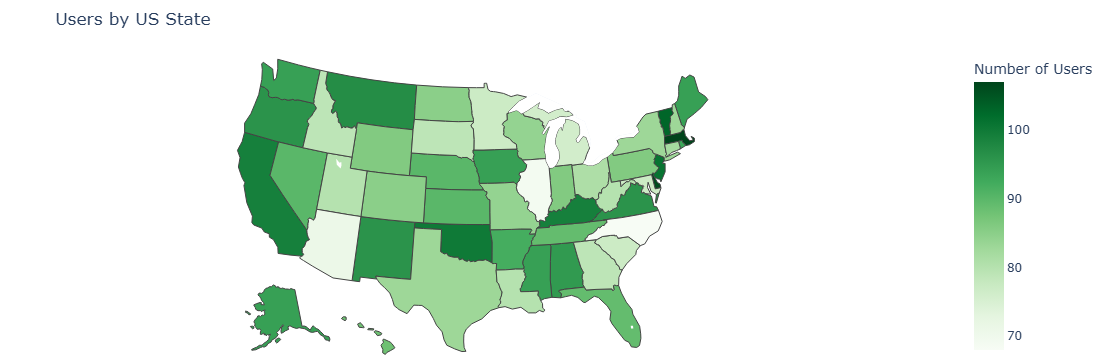

In [316]:
# Plotting information onto map

fig = go.Figure(data=go.Choropleth(
    locations=states_filtered["state_codes"],
    z = states_filtered["user_count"].astype(int),
    locationmode = "USA-states",
    colorscale="Greens",
    colorbar_title="Number of Users",))

# Improving map format

fig.update_layout(
    geo=dict(showframe=False, showcoastlines=True, 
             projection_type='albers usa'),
    title_text="Users by US State",
    margin=dict(l=0, r=0, t=50, b=0)
)
    

fig.show()

In [318]:
#Creating dataframes to display alongside the map showing the 10 states with most and least users

top_10 = states_filtered.head(10)
bottom_10 = states_filtered.tail(10)